# Loan Application Status Prediction


## Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

# Independent Variables:

-Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

-Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

-Married - This refers to applicant being in a state of matrimony

-Dependents - This refres to persons who depends on the applicants for survival

-Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

-Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

-Applicant Income - This refers to disposable income available for the applicant's use under State law.

-CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

-Loan_Amount - This refers to the amount of money an applicant owe at any given time.

-Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

-Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

-Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

-Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [1]:
#header files
import pandas as pd
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#read file
df=pd.read_csv('loan.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


# Data Cleaning

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

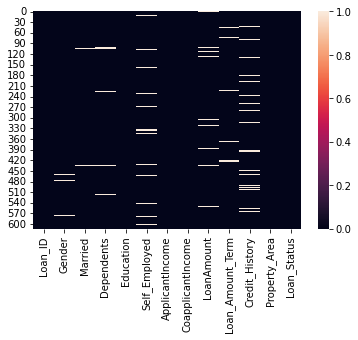

In [11]:
sns.heatmap(df.isnull())

In [3]:
#imputation using median and mode method 

df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [109]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

no null values

<AxesSubplot:>

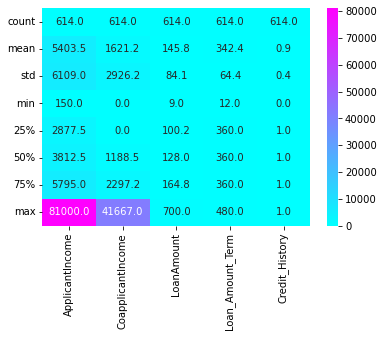

In [22]:
sns.heatmap(df.describe(),fmt='0.1f',annot = True,cmap='cool')

In [4]:
#no useful information
df=df.drop(columns="Loan_ID", axis=1)

# separating the numerical and catagorical columns


In [5]:
category=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        category.append(i)
print(len(category))
category

7


['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [6]:
numerical=[]
for j in df.dtypes.index:
    if df.dtypes[j]!='object':
        numerical.append(j)
print(len(numerical))
numerical

5


['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# Data Visualisation


## Univariate Analysis

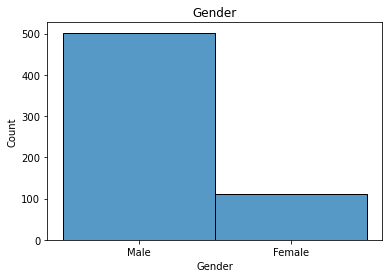

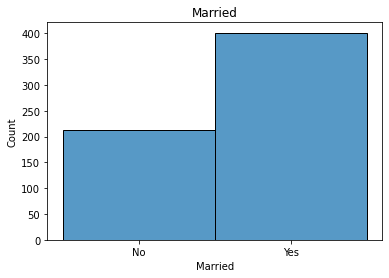

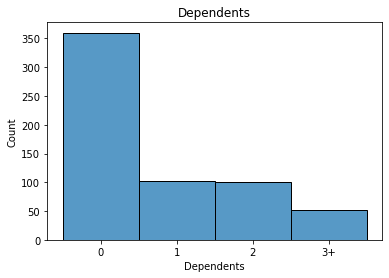

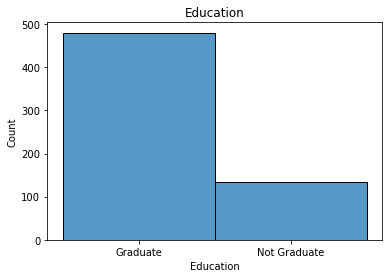

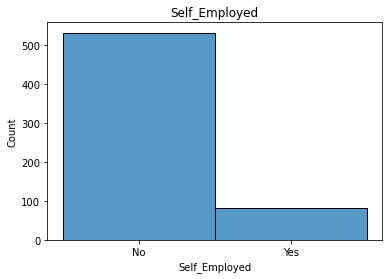

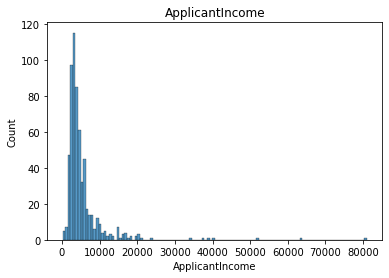

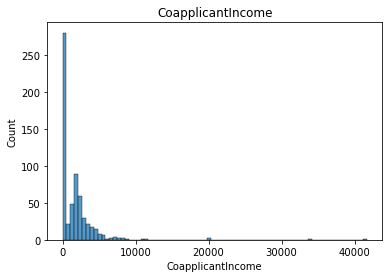

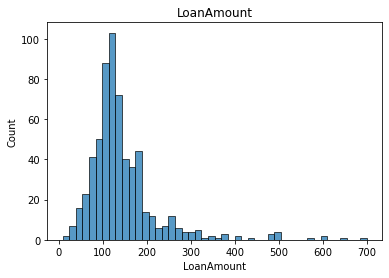

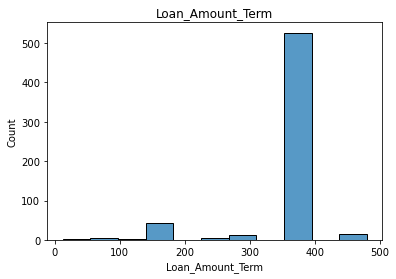

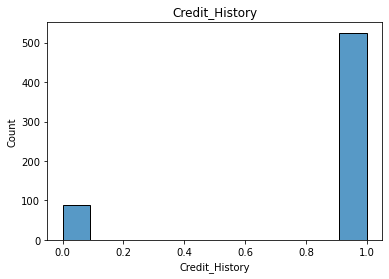

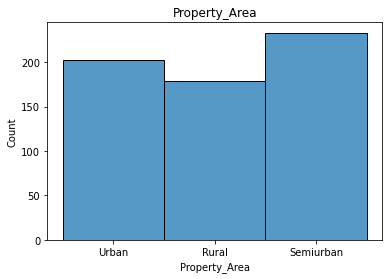

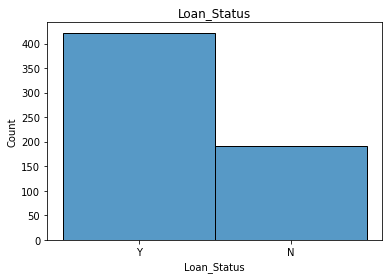

In [30]:
for col in df.columns:
    sns.histplot(df[col])
    plt.title(col)
    plt.show()

## bivariant anlysis

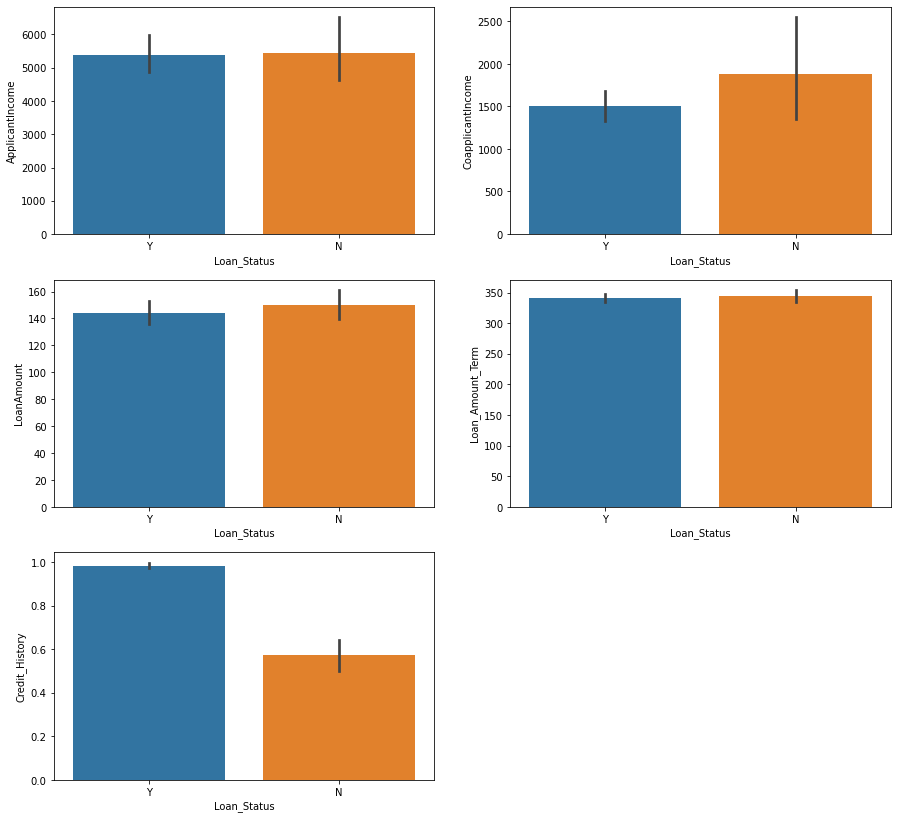

In [8]:
plt.figure(figsize=(15,200))
j = 0
for column, dtype in df.drop('Loan_Status',axis=1).dtypes.items():

    if dtype != 'object':
        j += 1
        plt.subplot(40,2,j)
        sns.barplot(df['Loan_Status'],df[column])

## multivariant analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

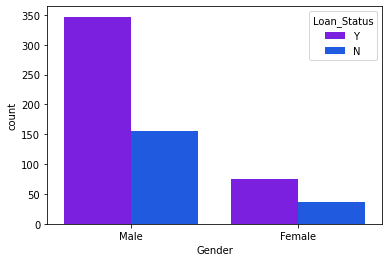

In [29]:
sns.countplot("Gender",data=df, hue='Loan_Status')

<AxesSubplot:xlabel='Education', ylabel='count'>

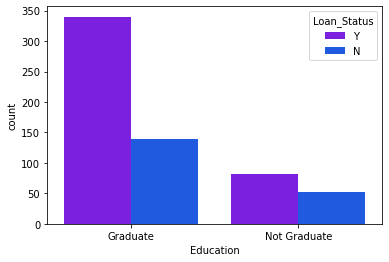

In [30]:
sns.countplot("Education",data=df, hue='Loan_Status')

<AxesSubplot:xlabel='Married', ylabel='count'>

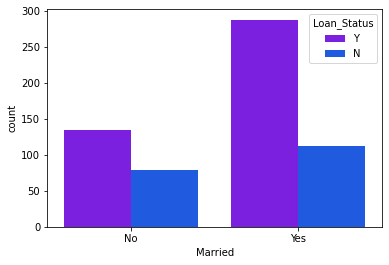

In [31]:
sns.countplot("Married",data=df, hue='Loan_Status')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

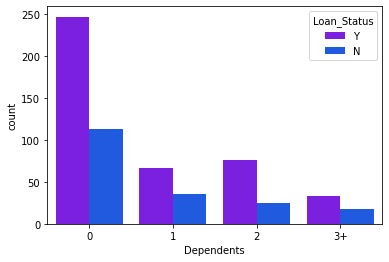

In [32]:
sns.countplot("Dependents",data=df, hue='Loan_Status')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

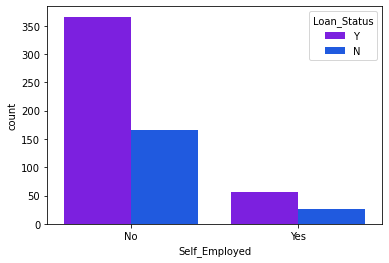

In [41]:
sns.countplot("Self_Employed",data=df, hue='Loan_Status')


In [36]:
pd.crosstab([df['Dependents'],df['Gender'],df['Education'],df['Married']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

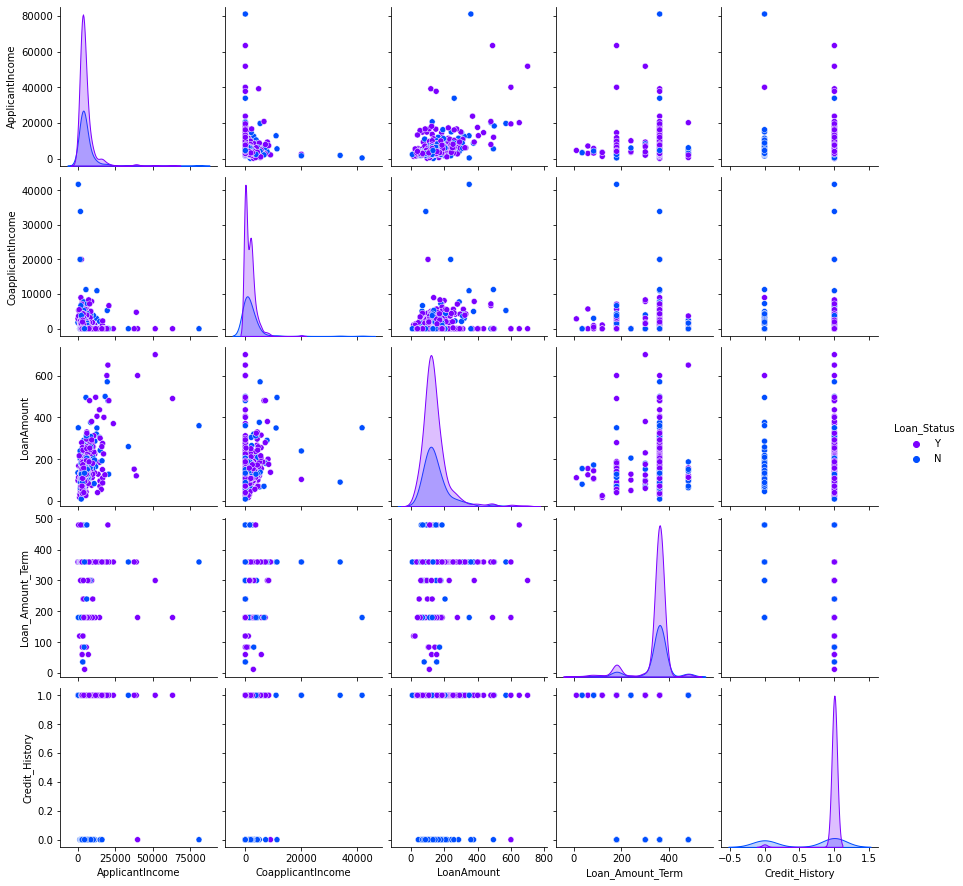

In [26]:
sns.pairplot(df,hue="Loan_Status")

## Encoding categorical data

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in category:
    df[i] = le.fit_transform(df[i])
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Feature selection and Engineering

## Detection and removal of outliners

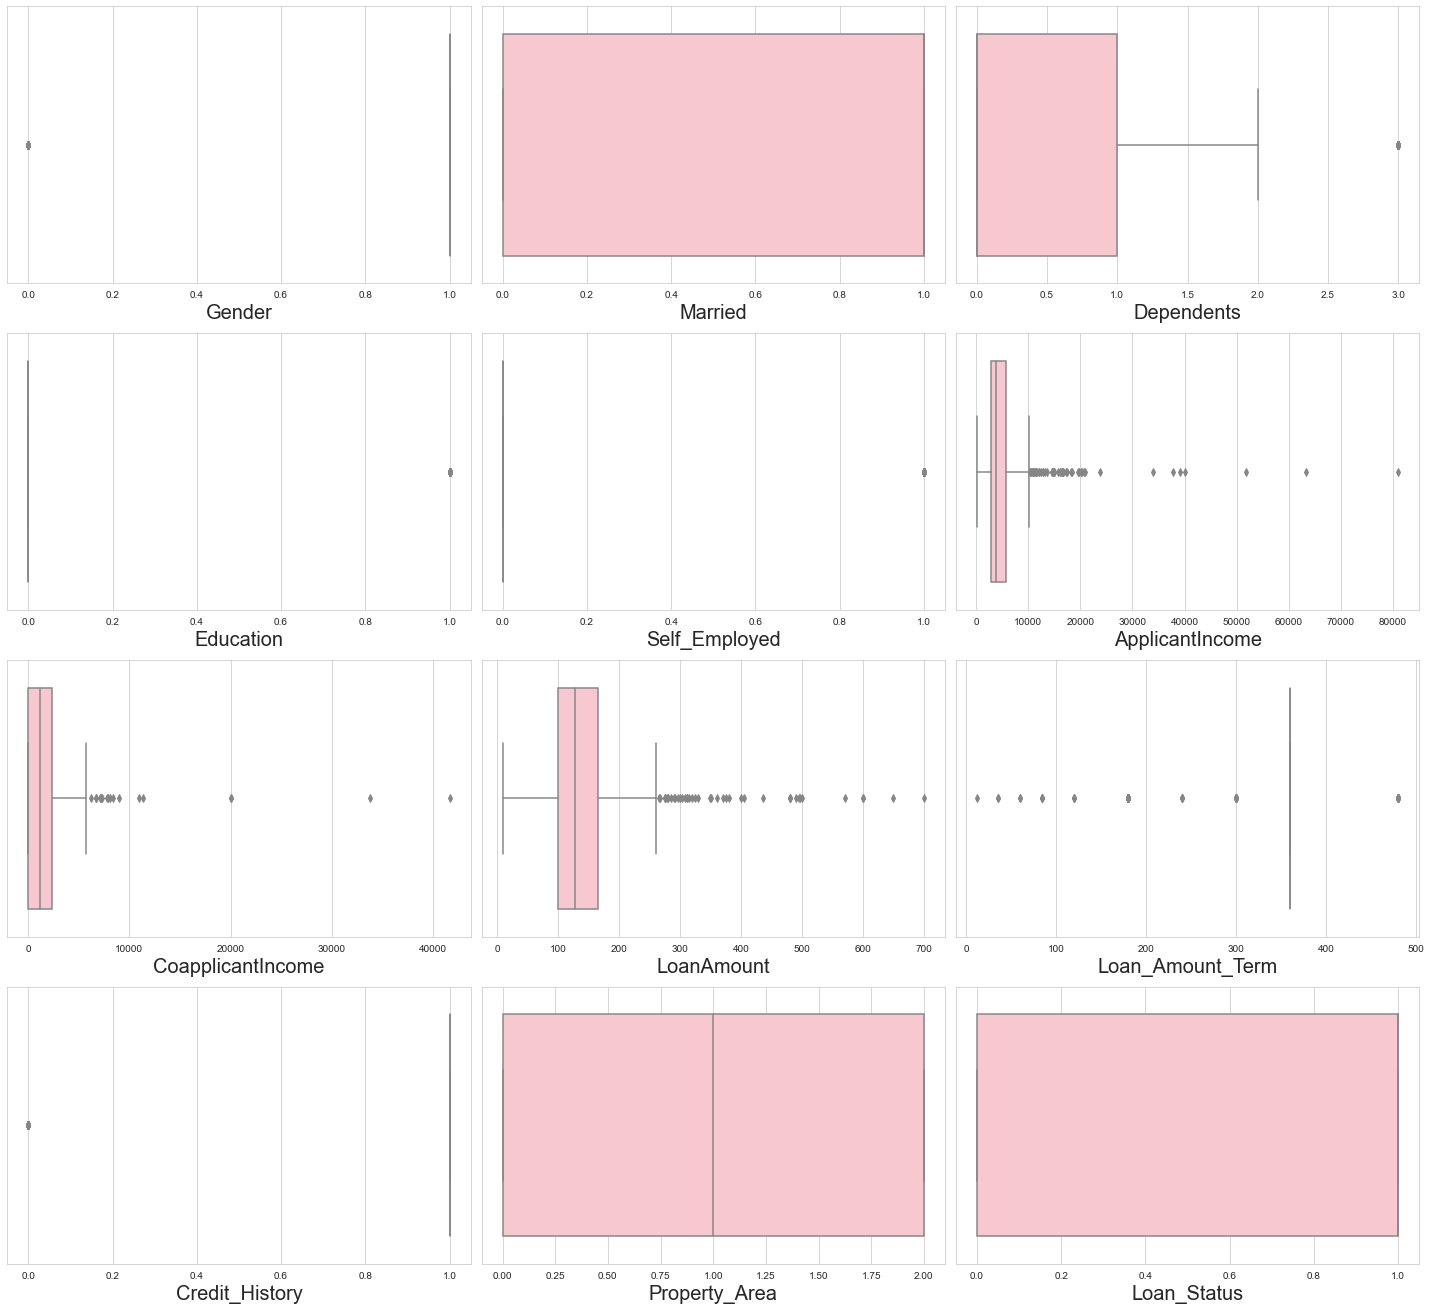

In [58]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='pink')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [8]:
#using z-score
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [115]:
print("data loss",((614-577)/614)*100)

data loss 6.026058631921824


dataloss is acceptable

## Detection and removal of skewness

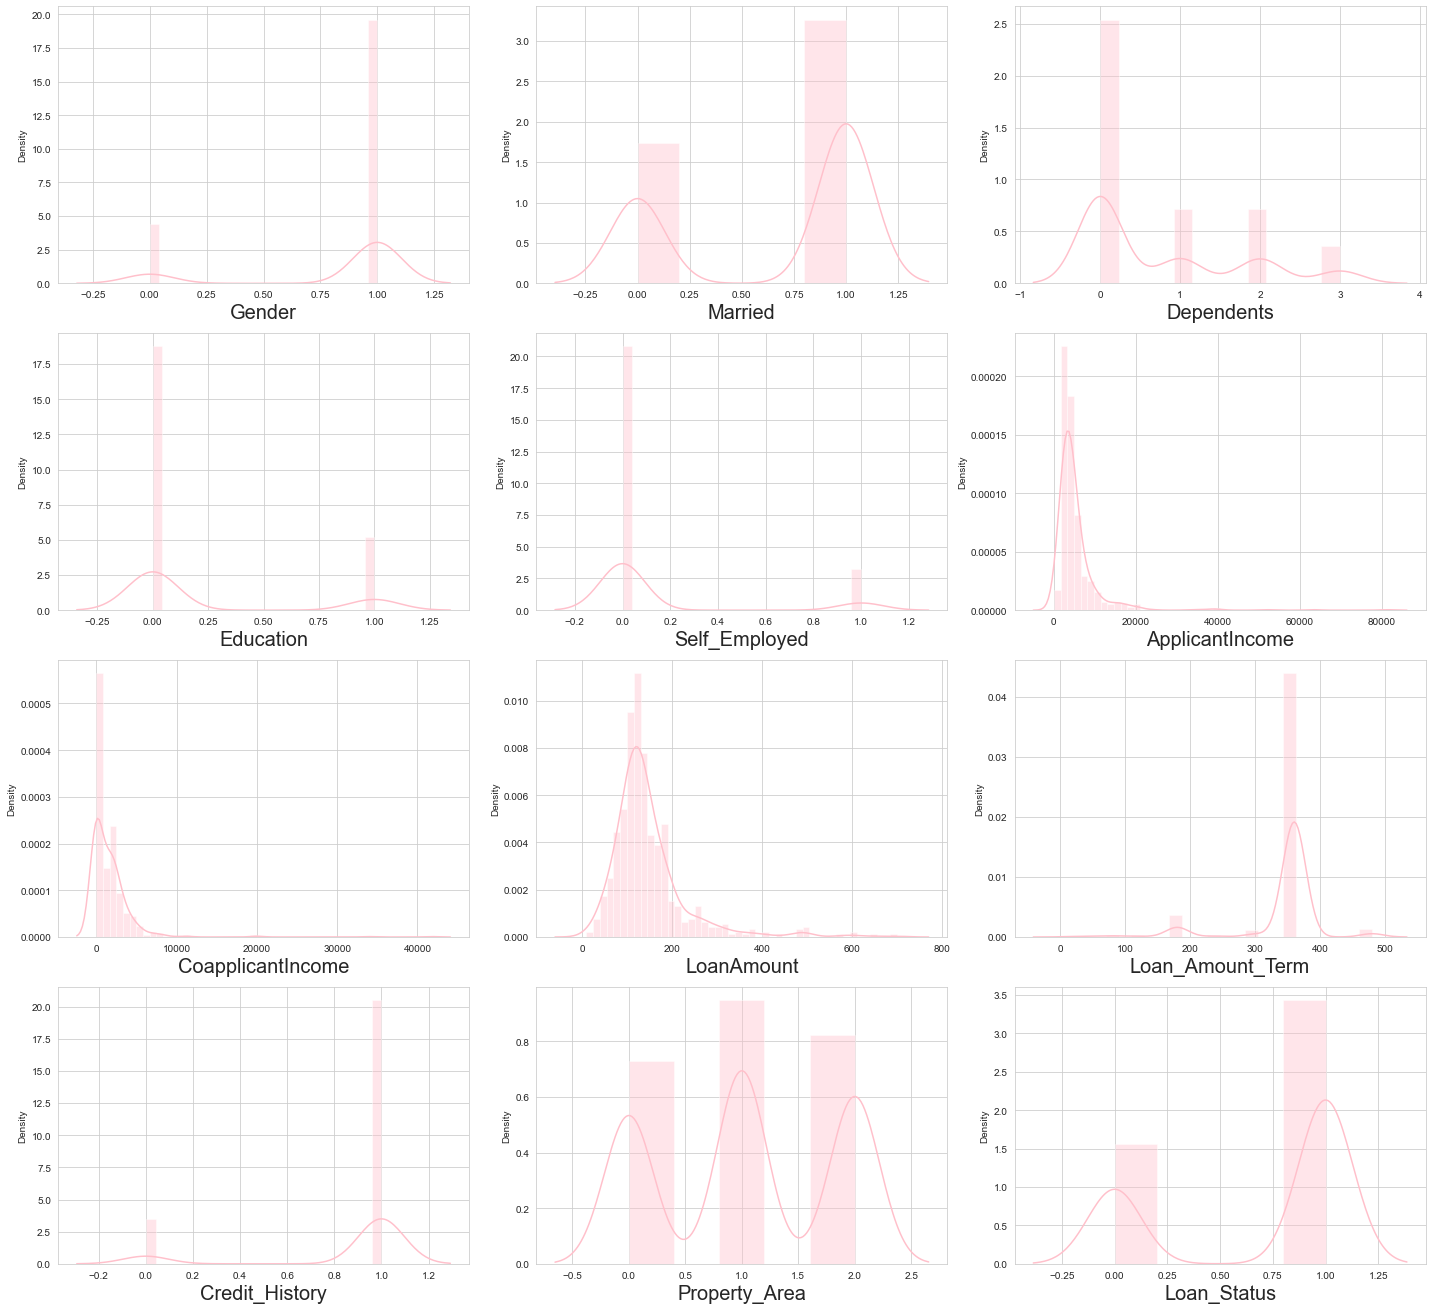

In [68]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(df[column],color='pink')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [116]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Skewness is present

In [9]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [10]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
Features=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
df[Features] = scaler.fit_transform(df[Features].values)

In [120]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.441404
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.020831
Loan_Amount_Term     0.392571
Credit_History      -2.021971
Property_Area       -0.158267
Loan_Status         -0.809998
dtype: float64

skewness is in limit

## Detection and removal of correltion

In [138]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.058036,0.039442,0.032874,0.010679,-0.017941,0.033379,-0.027595,-0.030603,-0.155693,0.011773
Gender,-0.028029,1.000000,0.364569,0.162937,0.045364,-0.000525,0.087227,0.219590,0.142137,-0.080405,0.009170,-0.030017,0.017987
Married,-0.016013,0.364569,1.000000,0.355531,0.012304,0.004489,0.016968,0.312596,0.179350,-0.123179,0.010938,0.004488,0.091478
Dependents,0.058036,0.162937,0.355531,1.000000,0.044038,0.079245,0.112222,0.014861,0.154627,-0.114250,-0.026755,0.032672,0.008400
Education,0.039442,0.045364,0.012304,0.044038,1.000000,-0.010383,-0.178206,0.038406,-0.149533,-0.057505,-0.073658,-0.066829,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.079245,-0.010383,1.000000,0.185468,-0.089864,0.111002,-0.038754,-0.001550,-0.030541,-0.003700
ApplicantIncome,0.010679,0.087227,0.016968,0.112222,-0.178206,0.185468,1.000000,-0.367287,0.483447,-0.054431,0.012667,-0.029069,0.013568
CoapplicantIncome,-0.017941,0.219590,0.312596,0.014861,0.038406,-0.089864,-0.367287,1.000000,0.136998,0.004565,0.007486,-0.056192,0.056869
LoanAmount,0.033379,0.142137,0.179350,0.154627,-0.149533,0.111002,0.483447,0.136998,1.000000,0.058125,-0.016884,-0.092462,-0.038533
Loan_Amount_Term,-0.027595,-0.080405,-0.123179,-0.114250,-0.057505,-0.038754,-0.054431,0.004565,0.058125,1.000000,-0.013188,-0.041790,-0.053574


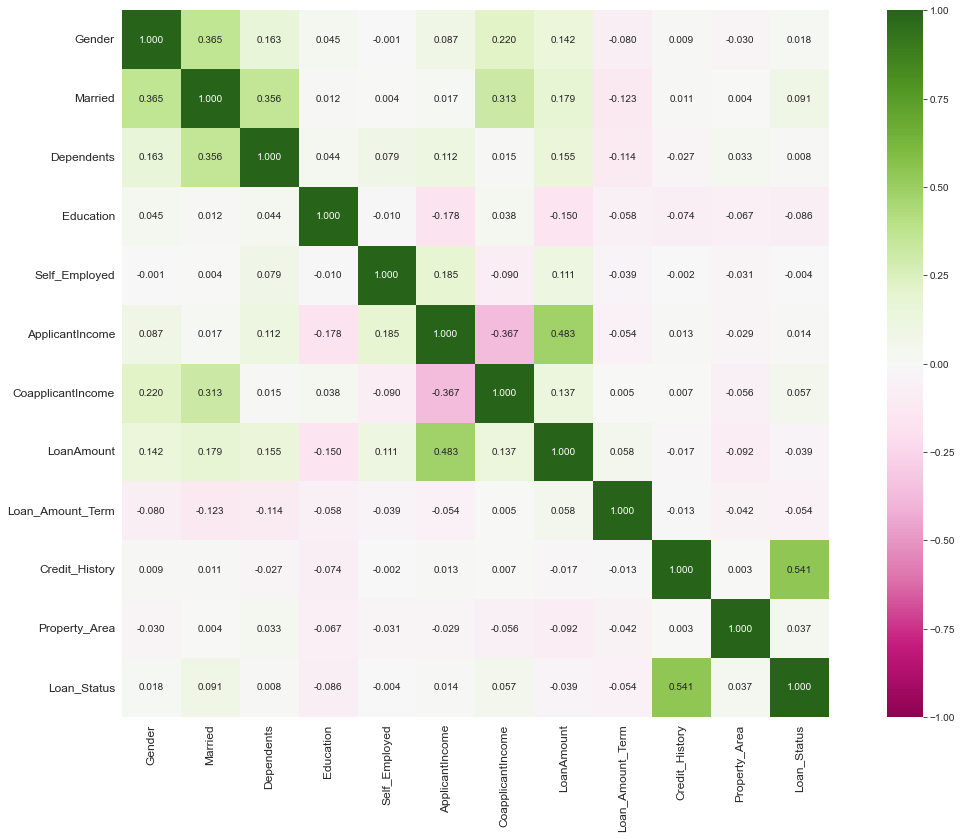

In [97]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="PiYG")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

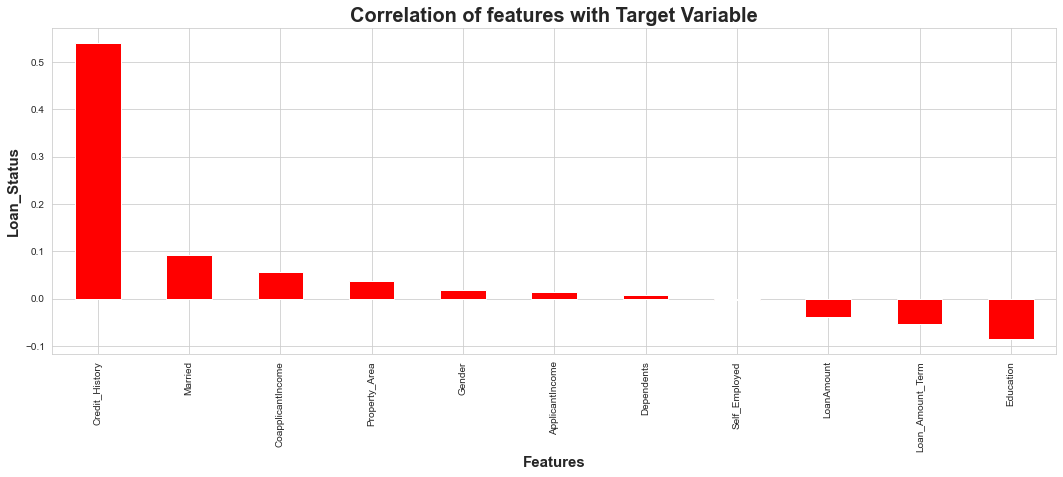

In [98]:
plt.figure(figsize = (18,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'r')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Loan_Status',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable',fontsize = 20,fontweight='bold')
plt.show()

## Checking multicollinearity

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif


,VIF,Features
0,1.206046,Gender
1,1.425510,Married
2,1.193162,Dependents
3,1.068954,Education
4,1.043751,Self_Employed
5,1.854525,ApplicantIncome
6,1.556665,CoapplicantIncome
7,1.608324,LoanAmount
8,1.048798,Loan_Amount_Term
9,1.420019,Credit_History


all values are under 10

## checking and balancing target variable

In [139]:
df.Loan_Status.value_counts()

 0.674519    422
-1.482537    192
Name: Loan_Status, dtype: int64

In [12]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


In [141]:
!pip install imbalanced-learn

In [13]:
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [14]:
#using smote method
oversample = SMOTE()
Y=Y.astype('int')
X, Y = oversample.fit_resample(X, Y)

In [15]:
Y.value_counts()


 0    422
-1    422
Name: Loan_Status, dtype: int64

#target variable is balanced

## scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Building Model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=.33)

## Findind best random state

In [19]:
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7677165354330708 on Random_state 62


# Classification model

In [161]:
model=[
        LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 22),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print(accuracy_score(Y_test, y_pred))
    print(confusion_matrix(Y_test, y_pred))
    print(classification_report(Y_test,y_pred))
    print('cv:',cross_val_score(m,X,Y,cv=5).mean())
    print('============================================================================================================')

0.7562724014336918
[[ 89  59]
 [  9 122]]
              precision    recall  f1-score   support

          -1       0.91      0.60      0.72       148
           0       0.67      0.93      0.78       131

    accuracy                           0.76       279
   macro avg       0.79      0.77      0.75       279
weighted avg       0.80      0.76      0.75       279

cv: 0.7085164835164834
0.5412186379928315
[[71 77]
 [51 80]]
              precision    recall  f1-score   support

          -1       0.58      0.48      0.53       148
           0       0.51      0.61      0.56       131

    accuracy                           0.54       279
   macro avg       0.55      0.55      0.54       279
weighted avg       0.55      0.54      0.54       279

cv: 0.15874894336432796
0.7311827956989247
[[ 78  70]
 [  5 126]]
              precision    recall  f1-score   support

          -1       0.94      0.53      0.68       148
           0       0.64      0.96      0.77       131

    accuracy 

# Hyper Parameter Tuning 

In [24]:
from sklearn.model_selection import GridSearchCV

In [21]:
AdaBoostClassifier().get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [22]:
param_grid = {'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1],'random_state':np.arange(50)}

GridSearchCV = GridSearchCV(AdaBoostClassifier(),param_grid=param_grid,n_jobs=-1,cv=5)


In [25]:
GCV = GridSearchCV(AdaBoostClassifier(),param_grid,cv=3,n_jobs = -1,verbose=3)
GCV.fit(X_train,Y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [10, 50, 250, 1000],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             verbose=3)

In [26]:
GCV.best_params_

{'learning_rate': 0.1, 'n_estimators': 250, 'random_state': 31}

# last model

In [29]:
Final = AdaBoostClassifier(learning_rate=0.1, n_estimators=250, random_state=31)
Final.fit(X_train,Y_train)
y_pred=Final.predict(X_test)
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

Accuracy Score : 0.7007874015748031


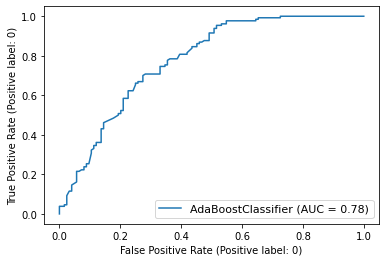

<Figure size 720x720 with 0 Axes>

In [43]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()

# save file

In [45]:
import joblib
joblib.dump(Final,'Loan_Status.pkl')

['Loan_Status.pkl']